In [1]:
import os
import numpy as np
from base import *

pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human skin\test model'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing annotations')
pthtestim = os.path.join(pthtest, '10x')
nm = 'ANACODA_09_06_2024'

WS = [[0, 0, 2, 0, 2, 0, 1, 0, 2], [9, 8], 
      [1, 2, 3, 4, 5, 6, 7, 5, 8], 
      [8, 5, 4, 7, 6, 2, 1, 3, 9], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[102, 51, 0],
                  [1, 109, 157],
                  [81, 179, 93],
                  [250, 213, 164],
                  [255, 51, 0],
                  [255, 244, 25],
                  [255, 189, 222],
                  [255, 255, 255]])
classNames = ['follicle', 'sweat gland', 'oil gland', 'epidermis','collagen','blood vessel','fat','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...


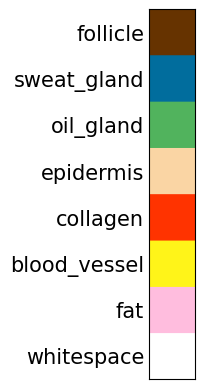

In [2]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [3]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Loading PNG images...
Image 1 of 5: OTS-21-11041 - 2021-11-15 12.13.09
 annotation data previously loaded
Image 2 of 5: OTS-21-11041 - 2021-11-15 13.26.29
 annotation data previously loaded
Image 3 of 5: OTS-21-11041 - 2021-11-15 14.36.12
 annotation data previously loaded
Image 4 of 5: OTS-21-11041 - 2021-11-15 15.53.22
 annotation data previously loaded
Image 5 of 5: OTS-21-11041 - 2021-11-15 16.47.58
 annotation data previously loaded


In [4]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 386718100.0 pixels of follicle. This is the most common class.
 There are 49596100.0 pixels of sweat gland, 12% of the most common class.
 There are 114012000.0 pixels of oil gland, 29% of the most common class.
 There are 193555000.0 pixels of epidermis, 50% of the most common class.
 There are 368207700.0 pixels of collagen, 95% of the most common class.
 There are 29647700.0 pixels of blood vessel, 7% of the most common class.
 There are 99208000.0 pixels of fat, 25% of the most common class.
 There are 265290000.0 pixels of whitespace, 68% of the most common class.

Building training tiles...
Starting time for the while loop
Total time elapsed for the while loop: 595.3528299331665
Saving big tiles
  1 of 15 training images completed in 10 minutes
  Used 373.1% counts and 81.5% unique annotations of follicle
  Used 1323.3% counts and 100.0% unique annotations of sweat gland
  Used 595.3% counts and 100.0% uniq

No GPU available. Ensure that the NVIDIA GPU and CUDA are correctly installed.
Starting model training...
Epoch 1/8
375/375 [==============================] - 6938s 19s/step - loss: 0.2684 - accuracy: 0.9028 - val_loss: 0.1855 - val_accuracy: 0.9300
Epoch 2/8
375/375 [==============================] - 6950s 19s/step - loss: 0.1315 - accuracy: 0.9494 - val_loss: 0.1251 - val_accuracy: 0.9515
Epoch 3/8
375/375 [==============================] - 6943s 19s/step - loss: 0.1036 - accuracy: 0.9589 - val_loss: 0.1122 - val_accuracy: 0.9567
Epoch 4/8
375/375 [==============================] - 6950s 19s/step - loss: 0.0877 - accuracy: 0.9645 - val_loss: 0.1025 - val_accuracy: 0.9605
Epoch 5/8
375/375 [==============================] - 6966s 19s/step - loss: 0.0799 - accuracy: 0.9674 - val_loss: 0.1011 - val_accuracy: 0.9613
Epoch 6/8
375/375 [==============================] - 6953s 19s/step - loss: 0.0741 - accuracy: 0.9695 - val_loss: 0.0960 - val_accuracy: 0.9633
Epoch 7/8
375/375 [===========

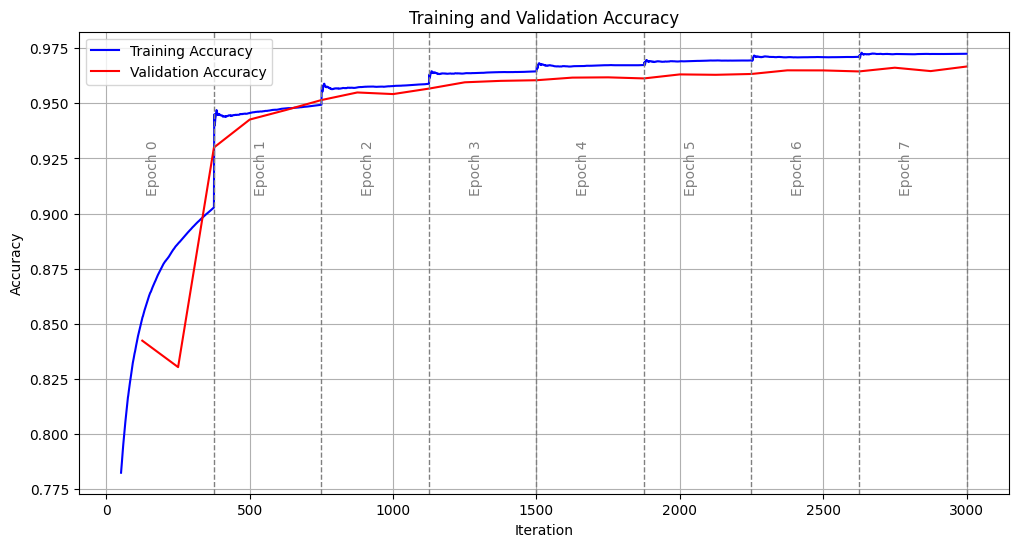

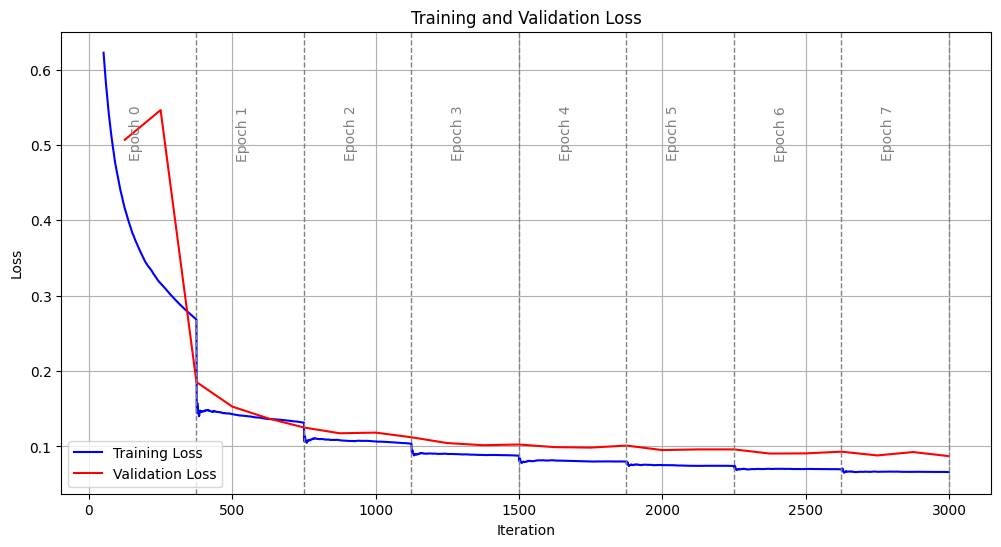

In [5]:
train_segmentation_model(pthDL, fine_tune=False)

Testing segmentation model......
 
Importing annotation data...
 
 Loading PNG images...
Image 1 of 1: OTS-21-11041 - 2021-11-15 09.49.33
 annotation data previously loaded
   
  Starting classification of image 1 of 1: OTS-21-11041 - 2021-11-15 09.49.33.tif
Image 1 of 1 took 316 s
  Total time for classification: 0.0h 5.0m 25.115482568740845s


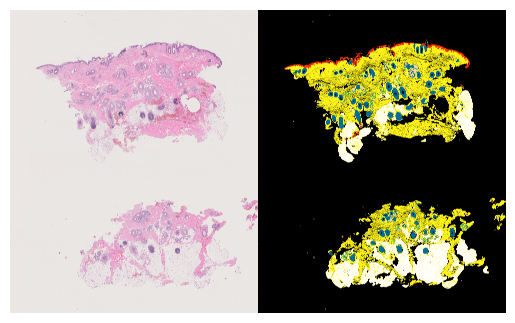


Calculating total number of pixels in the testing dataset...
  There are 919893 pixels of follicle, 96% of the most common class.
  There are 127046 pixels of sweat gland, 13% of the most common class.
  There are 96052 pixels of oil gland, 10% of the most common class.
  There are 208730 pixels of epidermis, 21% of the most common class.
  There are 953149 pixels of collagen. This is the most common class.
  There are 38181 pixels of blood vessel, 4% of the most common class.
  There are 323099 pixels of fat, 33% of the most common class.
  There are 226797 pixels of whitespace, 23% of the most common class.


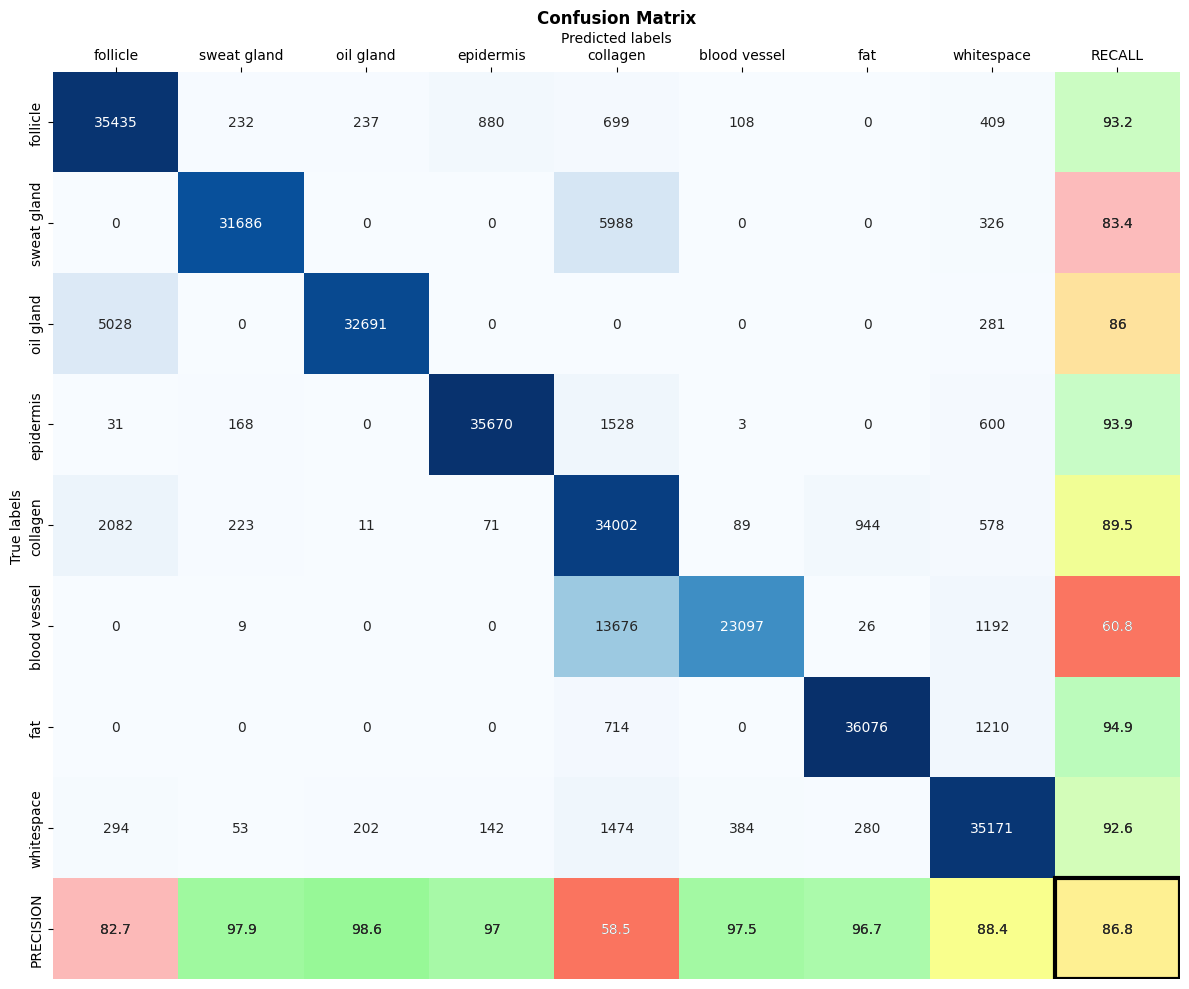


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human skin\test model\ANACODA_09_06_2024\confusion_matrix.jpg

Overall Accuracy: 86.8%


In [6]:
test_segmentation_model(pthDL, pthtest, pthtestim)

   
  Starting classification of image 1 of 5: OTS-21-11041 - 2021-11-15 12.13.09.tif
Image 1 of 5 took 596 s
  Starting classification of image 2 of 5: OTS-21-11041 - 2021-11-15 13.26.29.tif
Image 2 of 5 took 563 s
  Starting classification of image 3 of 5: OTS-21-11041 - 2021-11-15 14.36.12.tif
Image 3 of 5 took 416 s
  Starting classification of image 4 of 5: OTS-21-11041 - 2021-11-15 15.53.22.tif
Image 4 of 5 took 319 s
  Starting classification of image 5 of 5: OTS-21-11041 - 2021-11-15 16.47.58.tif
Image 5 of 5 took 269 s
  Total time for classification: 0.0h 39.0m 11.95052433013916s


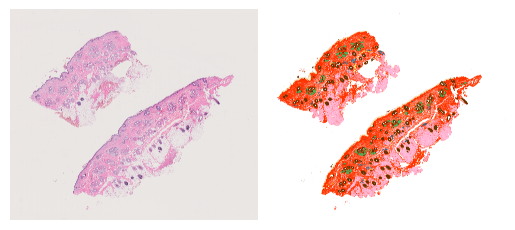

'\\\\10.99.68.52\\Kiemendata\\Valentina Matos\\tissues for methods paper\\human skin\\test model\\10x\\classification_ANACODA_09_06_2024'

In [7]:
classify_images(pthim,pthDL)